# API to convert all currencies to EURO

In [2]:
import pandas as pd

In [3]:
df2 = pd.read_csv("PM_extract_Jan_2025_10_brands.csv",sep=';')
df2.head()
df2['currency'].unique()

array(['AED', 'CHF', 'CNY', 'EUR', 'GBP', 'HKD', 'JPY', 'KRW', 'TWD',
       'USD', 'SGD'], dtype=object)

In [4]:
import requests

API_KEY = "de4fccc91b67e21b692e0af1"  # Replace with your actual API key
BASE_CURRENCY = "EUR"

# Function to get exchange rates
def get_exchange_rates():
    url = f"https://v6.exchangerate-api.com/v6/{API_KEY}/latest/{BASE_CURRENCY}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        return data['conversion_rates']
    else:
        print("Error fetching exchange rates:", response.status_code)
        return None

# Fetch exchange rates
exchange_rates = get_exchange_rates()
exchange_rates

{'EUR': 1,
 'AED': 3.8497,
 'AFN': 76.739,
 'ALL': 99.0234,
 'AMD': 415.8668,
 'ANG': 1.8763,
 'AOA': 976.5207,
 'ARS': 1110.1671,
 'AUD': 1.6484,
 'AWG': 1.8763,
 'AZN': 1.7822,
 'BAM': 1.9558,
 'BBD': 2.0965,
 'BDT': 127.3382,
 'BGN': 1.9558,
 'BHD': 0.3941,
 'BIF': 3110.8228,
 'BMD': 1.0482,
 'BND': 1.4054,
 'BOB': 7.2489,
 'BRL': 5.9762,
 'BSD': 1.0482,
 'BTN': 91.0211,
 'BWP': 14.4912,
 'BYN': 3.4238,
 'BZD': 2.0965,
 'CAD': 1.4873,
 'CDF': 2998.4167,
 'CHF': 0.9443,
 'CLP': 987.3428,
 'CNY': 7.6127,
 'COP': 4317.3687,
 'CRC': 530.7876,
 'CUP': 25.1577,
 'CVE': 110.265,
 'CZK': 25.0529,
 'DJF': 186.2938,
 'DKK': 7.4596,
 'DOP': 65.1292,
 'DZD': 141.2608,
 'EGP': 53.0409,
 'ERN': 15.7236,
 'ETB': 134.7259,
 'FJD': 2.4075,
 'FKP': 0.8312,
 'FOK': 7.4601,
 'GBP': 0.8312,
 'GEL': 2.9589,
 'GGP': 0.8312,
 'GHS': 16.2877,
 'GIP': 0.8312,
 'GMD': 76.1142,
 'GNF': 9032.69,
 'GTQ': 8.0858,
 'GYD': 219.5451,
 'HKD': 8.1545,
 'HNL': 26.7221,
 'HRK': 7.5345,
 'HTG': 137.2157,
 'HUF': 401.6232

In [5]:
# Function to convert prices
def convert_to_eur(row):
    currency = row['currency']
    price = row['price']
    
    if currency in exchange_rates:
        return price / exchange_rates[currency]
    else:
        return None  # Keep None if currency is missing in exchange rates

# Apply conversion
df2['price_eur'] = df2.apply(convert_to_eur, axis=1)

In [9]:
df2 = df2.drop(columns=['url', 'image_url'])
df2.head()

,brand,collection,reference_code,country,life_span_date,category,scrapping_date,price_eur
0,Boucheron,ANIMAUX DE COLLECTION,WA017308,United Arab Emirates,2025-01-28 00:00:00,Watches,2025-01-06,53770.423669
1,Boucheron,ANIMAUX DE COLLECTION,WA017305,United Arab Emirates,2025-01-28 00:00:00,Watches,2025-01-06,72213.419227
2,Boucheron,ANIMAUX DE COLLECTION,WA021436,United Arab Emirates,2025-01-28 00:00:00,Watches,2025-01-06,82084.318259
3,Boucheron,ANIMAUX DE COLLECTION,WA021410,United Arab Emirates,2025-01-28 00:00:00,Watches,2025-01-06,82084.318259
4,Boucheron,ANIMAUX DE COLLECTION,WA021435,United Arab Emirates,2025-01-28 00:00:00,Watches,2025-01-06,82084.318259


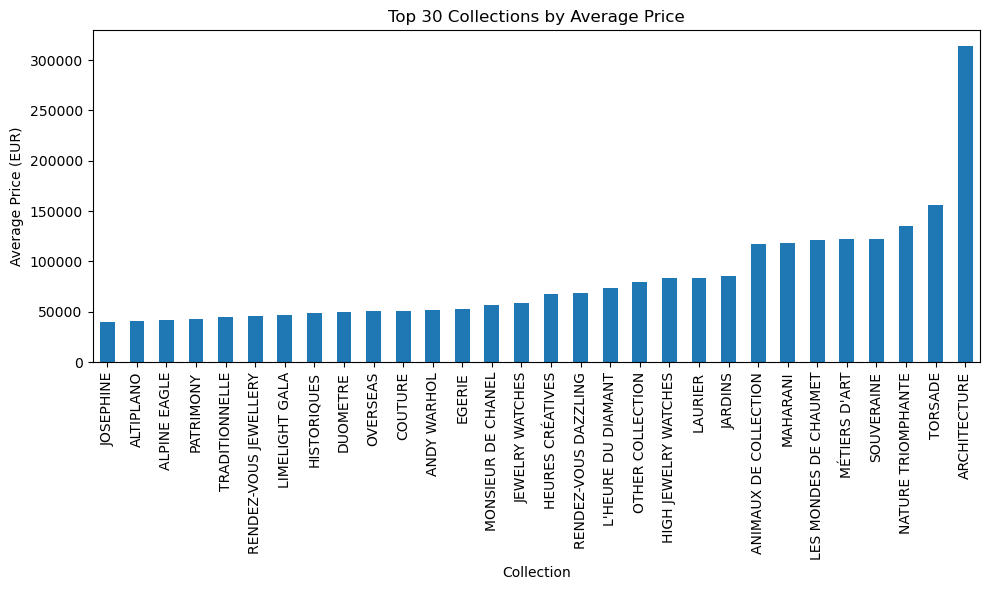

In [11]:
import matplotlib.pyplot as plt

# Compute the average price (in EUR) for each collection,
# then select the top 30 collections and sort them in ascending order for plotting
avg_prices_top30 = df2.groupby('collection')['price_eur'].mean().nlargest(30).sort_values()

# Plot the data as a bar chart
plt.figure(figsize=(10, 6))
avg_prices_top30.plot(kind='bar')
plt.xlabel('Collection')
plt.ylabel('Average Price (EUR)')
plt.title('Top 30 Collections by Average Price')
plt.tight_layout()
plt.show()